In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.feature_selection import RFE
from sklearn.cluster import KMeans
from scipy.stats import zscore

##### Read Input Customer Credit Card Data

In [2]:
credit_card_df = pd.read_excel("Credit Card Customer Data.xlsx")

#### Perform Univariate Analysis

In [3]:
credit_card_df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [4]:
credit_card_df.shape

(660, 7)

In [5]:
# there are 660 rows and 7 features in the input dataset.

In [6]:
# Check for missing data
credit_card_df.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [7]:
# There are no missing values in the input dataset

In [8]:
# The attributes in the feature set are:
# Customer Key : A unique key that identifies each customer
# Avg_Credit_Limit : Average credit card limit for the customer
# Total_Credit_Cards : Total number of credit cards held by the customer
# Total_visits_bank : Total number of visits made by the customer to the bank
# Total_visits_online : Number of visits made by the customer online.
# Total_calls_made : Total number of calls made by the customer

In [9]:
credit_card_df.dtypes

Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

In [10]:
credit_card_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


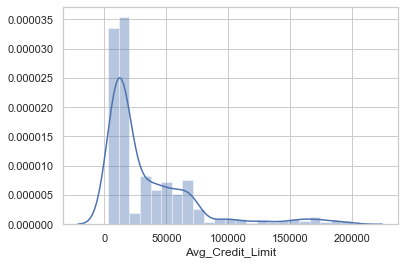

In [11]:
sns.distplot(credit_card_df['Avg_Credit_Limit'])
plt.show()

In [12]:
# The Average Credit Limit has a long tail. This indicates that there are
# multiple segments of customers in the data. 

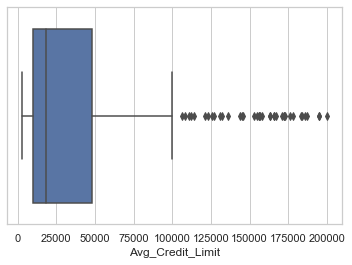

In [13]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=credit_card_df["Avg_Credit_Limit"])

In [14]:
# The box plot for Avg. Credit Limit indicates that there are several outliers. 
# These outliers could represent different segment of customers

In [15]:
credit_card_df['Avg_Credit_Limit'].value_counts()

8000      35
6000      31
9000      28
13000     28
10000     26
          ..
25000      1
153000     1
111000     1
112000     1
106000     1
Name: Avg_Credit_Limit, Length: 110, dtype: int64

In [16]:
# The data has single customers that have high credit limits. This may
# represent a separate cluster of customers than the ones that have a 
# lower credit card limit.

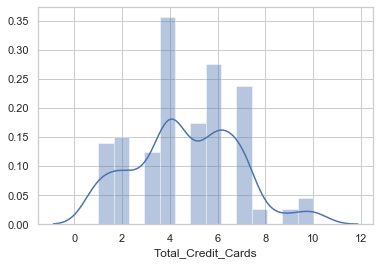

In [17]:
sns.distplot(credit_card_df['Total_Credit_Cards'])
plt.show()

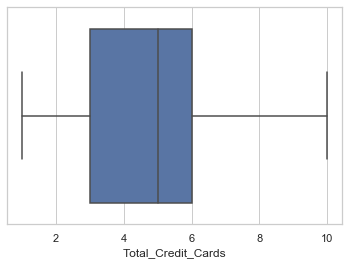

In [18]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=credit_card_df["Total_Credit_Cards"])

In [19]:
# THe total number of credit cards feature does not have outliers

In [20]:
# Customers have 1 to 10 credit cards with a median of 5 cards. 

In [21]:
credit_card_df['Total_Credit_Cards'].value_counts()

4     151
6     117
7     101
5      74
2      64
1      59
3      53
10     19
9      11
8      11
Name: Total_Credit_Cards, dtype: int64

In [22]:
# There appear to be a segment of customers that carry high number of
# credit cards vs. customers that have lower number of credit cards
# Approx. 50% of customers carry 4 to 7 cards. 

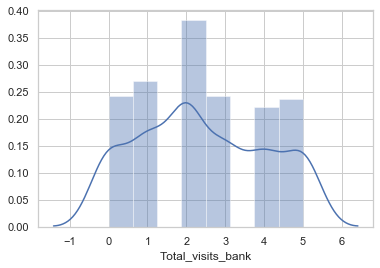

In [23]:
sns.distplot(credit_card_df['Total_visits_bank'])
plt.show()

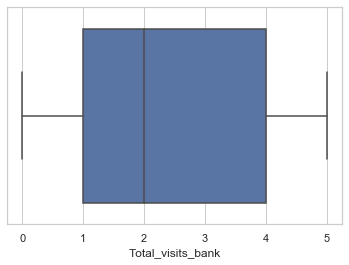

In [24]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=credit_card_df["Total_visits_bank"])

In [25]:
credit_card_df['Total_visits_bank'].value_counts()

2    158
1    112
3    100
0    100
5     98
4     92
Name: Total_visits_bank, dtype: int64

In [26]:
# The total visits to the bank do not have any outliers. 

In [27]:
# The total visits vary from 0 to 5 with a median of 2 visits.

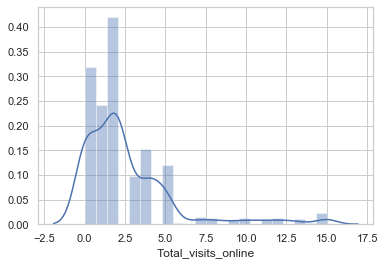

In [28]:
sns.distplot(credit_card_df['Total_visits_online'])
plt.show()

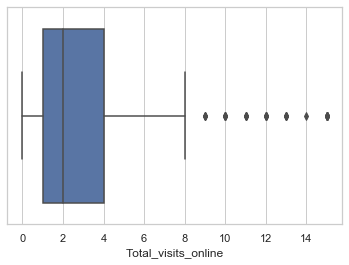

In [29]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=credit_card_df["Total_visits_online"])

In [30]:
# The total number of online visits has a long tail
# This feature has large outliers
# The outliers could represent a different segment of customers that 
# are largely online customers and do not prefer to make visits to the bank

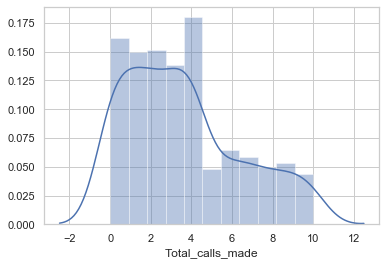

In [31]:
sns.distplot(credit_card_df['Total_calls_made'])
plt.show()

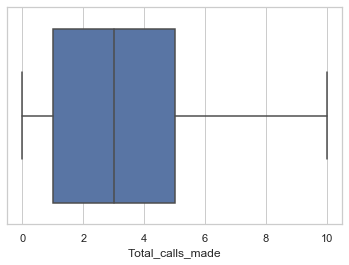

In [32]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=credit_card_df["Total_calls_made"])

In [33]:
# The total calls made by the customers do not have any outliers.

In [34]:
credit_card_df['Total_calls_made'].value_counts()

4     108
0      97
2      91
1      90
3      83
6      39
7      35
9      32
8      30
5      29
10     26
Name: Total_calls_made, dtype: int64

In [35]:
# There is a large number of customers who had to make more than one call
# to the bank.
# This may indicate service concerns as the customers are calling in multiple times.

#### Summary of Univariate Analysis

In [36]:
# there are 660 rows and 7 features in the input dataset.
# The attributes in the feature set are:
# Customer Key : A unique key that identifies each customer
# Avg_Credit_Limit : Average credit card limit for the customer
# Total_Credit_Cards : Total number of credit cards held by the customer
# Total_visits_bank : Total number of visits made by the customer to the bank
# Total_visits_online : Number of visits made by the customer online.
# Total_calls_made : Total number of calls made by the customer
# The Average Credit Limit has a long tail. This indicates that there are
# multiple segments of customers in the data. 
# The data has single customers that have high credit limits. This may
# represent a separate cluster of customers than the ones that have a 
# lower credit card limit.
# THe total number of credit cards feature does not have outliers
# Customers have 1 to 10 credit cards with a median of 5 cards. 
# There appear to be a segment of customers that carry high number of
# credit cards vs. customers that have lower number of credit cards
# Approx. 50% of customers carry 4 to 7 cards. 
# The total visits to the bank do not have any outliers. 
# The total visits vary from 0 to 5 with a median of 2 visits.
# The total number of online visits has a long tail
# This feature has large outliers
# The outliers could represent a different segment of customers that 
# are largely online customers and do not prefer to make visits to the bank
# The total calls made by the customers do not have any outliers.
# There is a large number of customers who had to make more than one call
# to the bank.
# This may indicate service concerns as the customers are calling in multiple times.

#### Perform Bivariate and Multivariate analysis

In [37]:
# Determine Correlation between numeric 

In [38]:
# Copy the input dataframe and drop Sl_No and Customer_Key

In [39]:
credit_card_attr=credit_card_df.copy()

In [40]:
credit_card_attr.drop(['Sl_No'], axis=1, inplace=True)

In [41]:
credit_card_attr.drop(['Customer Key'], axis=1, inplace=True)

In [42]:
credit_card_attr.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [43]:
credit_card_attr.shape

(660, 5)

In [44]:
credit_card_attr.corr().transpose()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Avg_Credit_Limit,1.000000,0.608860,-0.100312,0.551385,-0.414352
Total_Credit_Cards,0.608860,1.000000,0.315796,0.167758,-0.651251
Total_visits_bank,-0.100312,0.315796,1.000000,-0.551861,-0.506016
Total_visits_online,0.551385,0.167758,-0.551861,1.000000,0.127299
Total_calls_made,-0.414352,-0.651251,-0.506016,0.127299,1.000000


In [45]:
# Higher the number of credit cards, higher is the avg. credit limit
# Customers with high avg. credit limit are likely to transact online.
# Customers with high avg. credit limit who visit online are less likely to make calls.
# Customers who visit the bank more are less likely to visit online
# Customers who make calls have less avg. credit limits, # of cards and less visits to the bank

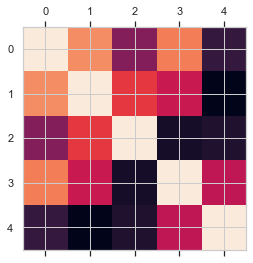

In [46]:
plt.matshow(credit_card_attr.corr())
plt.show()

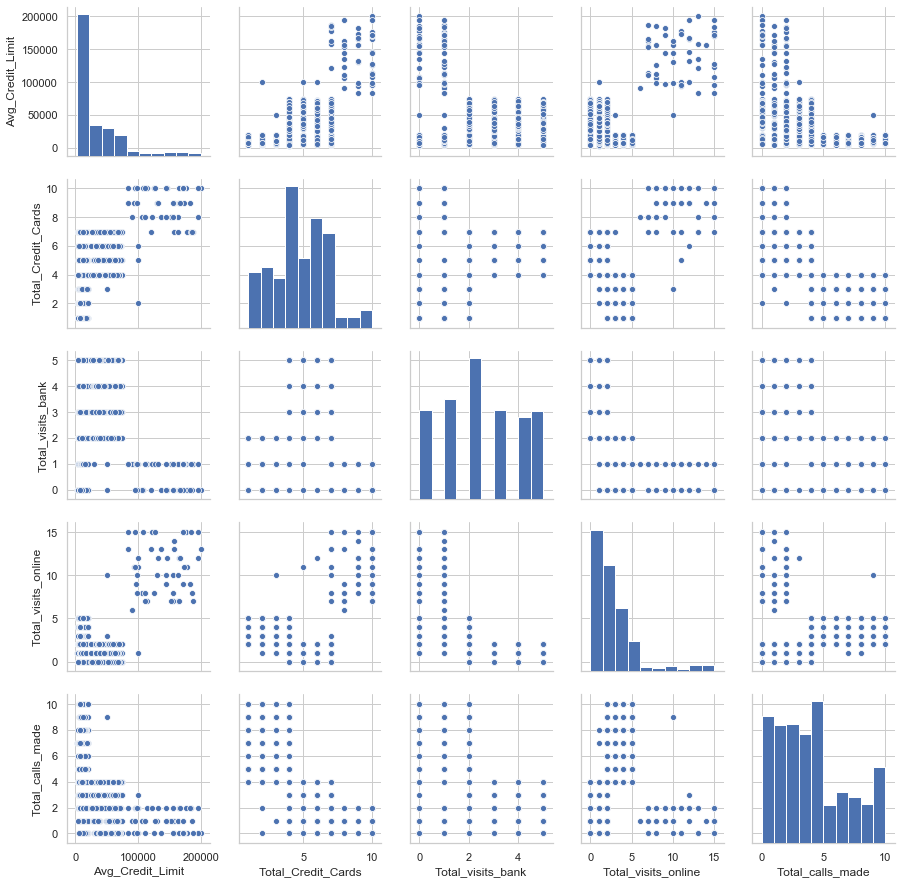

In [47]:
sns.pairplot(credit_card_attr)

#### Let's scale the input data

In [48]:
credit_card_scaled=credit_card_attr.apply(zscore)

In [49]:
credit_card_scaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


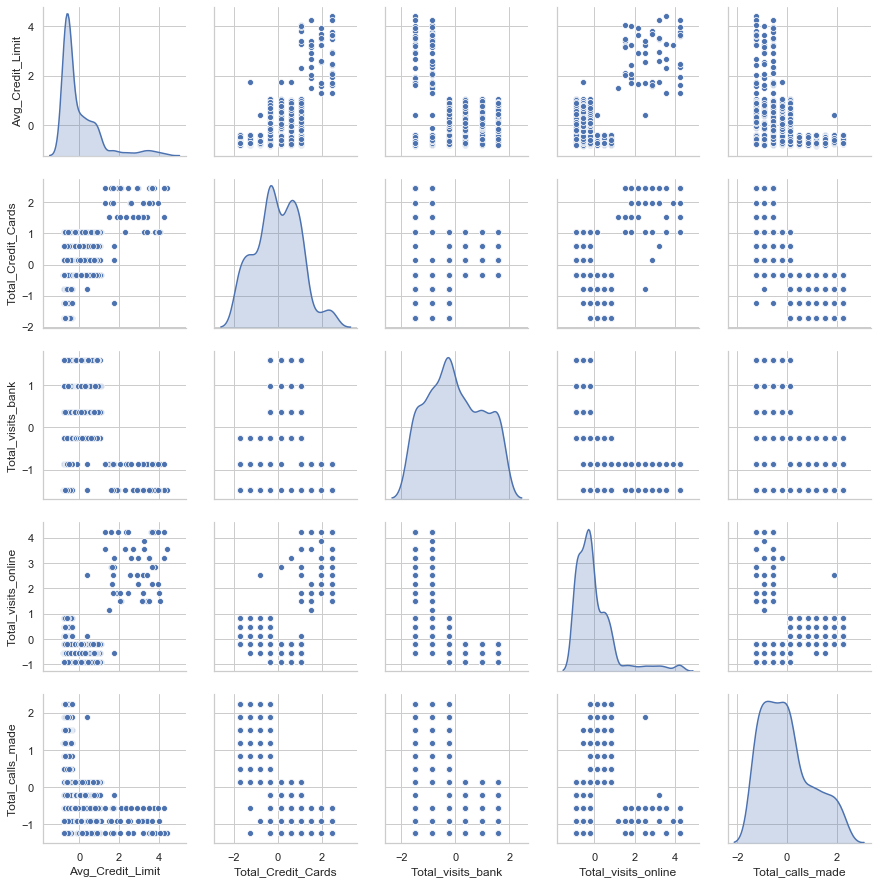

In [50]:
sns.pairplot(credit_card_scaled,diag_kind='kde')

#### Let's group data into clusters

In [51]:
# We will use K-Means clustering to group the data.
# We need to identify the number of clusters required.
# To identify this, let us perform an elbow test.

In [52]:
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

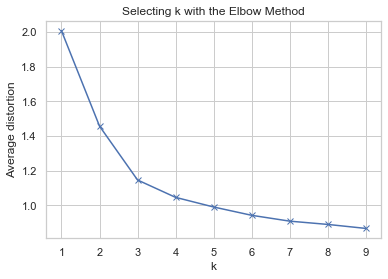

In [53]:
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(credit_card_scaled)
    prediction=model.predict(credit_card_scaled)
    meanDistortions.append(sum(np.min(cdist(credit_card_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / credit_card_scaled.shape[0])

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')


In [54]:
# There is a bend at k=3 indicating that there are likely 3 clusters in the data.

#### Let us perform a silhoutte analysis to determine the number of clusters

In [55]:
from sklearn.metrics import silhouette_score
range_n_clusters = list (range(2,10))
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(credit_card_scaled)
    centers = clusterer.cluster_centers_
    score = silhouette_score(credit_card_scaled, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.41842496663215445)
For n_clusters = 3, silhouette score is 0.5157182558881063)
For n_clusters = 4, silhouette score is 0.3556670619372605)
For n_clusters = 5, silhouette score is 0.27200815269931206)
For n_clusters = 6, silhouette score is 0.255499043345148)
For n_clusters = 7, silhouette score is 0.24857211535274673)
For n_clusters = 8, silhouette score is 0.22217007768727715)
For n_clusters = 9, silhouette score is 0.2200003144854339)


In [56]:
# The silhoutte analysis also indicates the highest score with k=3. 
# Therefore, we will look at 3 clusters to group the data

In [57]:
# Let us group the data with K = 3
cluster_model=KMeans(3)
cluster_model.fit(credit_card_scaled)
prediction=cluster_model.predict(credit_card_scaled)

#Append the prediction 
credit_card_df["GROUP"] = prediction
credit_card_scaled["GROUP"] = prediction
credit_card_attr["GROUP"] = prediction
print("Groups Assigned : \n")

Groups Assigned : 



In [58]:
credit_card_df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,1,87073,100000,2,1,1,0,0
1,2,38414,50000,3,0,10,9,1
2,3,17341,50000,7,1,3,4,0
3,4,40496,30000,5,1,1,4,0
4,5,47437,100000,6,0,12,3,2


#### Let's visualize the data in the clusters using BoxPlots

In [59]:
CreditCardClust = credit_card_df.groupby(['GROUP'])
CreditCardClust.mean()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,,,
0,417.528497,54881.329016,33782.383420,5.515544,3.489637,0.981865,2.000000
1,117.857143,55239.830357,12174.107143,2.410714,0.933036,3.553571,6.870536
2,611.280000,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000205AE40AD48>,
      dtype=object)

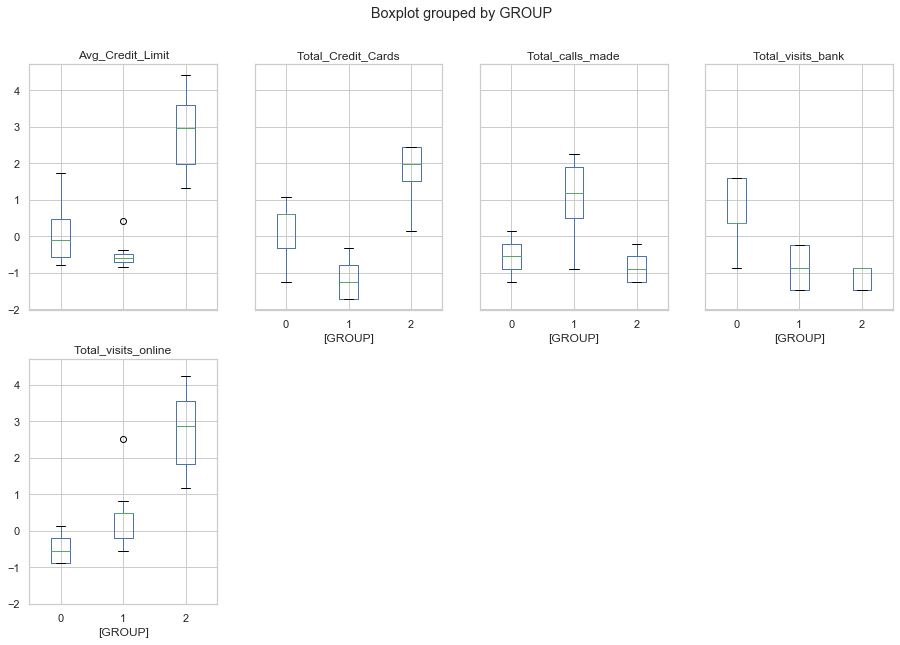

In [60]:
credit_card_scaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

#### Let us now perform a hierarchical clustering on the dataset

In [61]:
from sklearn.cluster import AgglomerativeClustering 

In [62]:
hier_model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')

In [63]:
# Let's create copies of the dataframes used for Kmeans clustering
# Remove the 'GROUP' column from the copies of dataframes to use for 
# Hierarchical clustering.

credit_card_df_hier = credit_card_df.copy()
credit_card_scaled_hier = credit_card_scaled.copy()
credit_card_attr_hier = credit_card_attr.copy()

credit_card_df_hier.drop(['GROUP'], axis=1, inplace=True)
credit_card_scaled_hier.drop(['GROUP'], axis=1, inplace=True)
credit_card_attr_hier.drop(['GROUP'], axis=1, inplace=True)

In [64]:
hier_model.fit(credit_card_scaled_hier)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [65]:
credit_card_attr_hier['labels'] = hier_model.labels_
credit_card_attr_hier.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,100000,2,1,1,0,0
1,50000,3,0,10,9,2
2,50000,7,1,3,4,0
3,30000,5,1,1,4,0
4,100000,6,0,12,3,1
5,20000,3,0,1,8,2
6,100000,5,0,11,2,1
7,15000,3,0,1,1,2
8,5000,2,0,2,2,2
9,3000,4,0,1,7,2


In [66]:
CreditCardClust_hier = credit_card_attr_hier.groupby(['labels'])

In [67]:
CreditCardClust_hier

In [68]:
CreditCardClust_hier.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,,
0,33713.178295,5.511628,3.485788,0.984496,2.005168
1,141040.000000,8.740000,0.600000,10.900000,1.080000
2,12197.309417,2.403587,0.928251,3.560538,6.883408


In [69]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [70]:
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [71]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(credit_card_scaled_hier, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(credit_card_scaled_hier))

c

0.8977080867389372

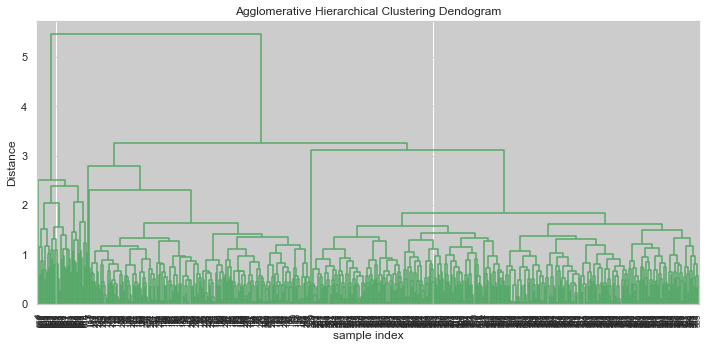

In [72]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

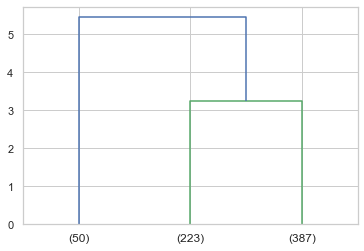

In [73]:
# Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

In [74]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(credit_card_scaled_hier, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(credit_card_scaled_hier))

c

0.8599730607972423

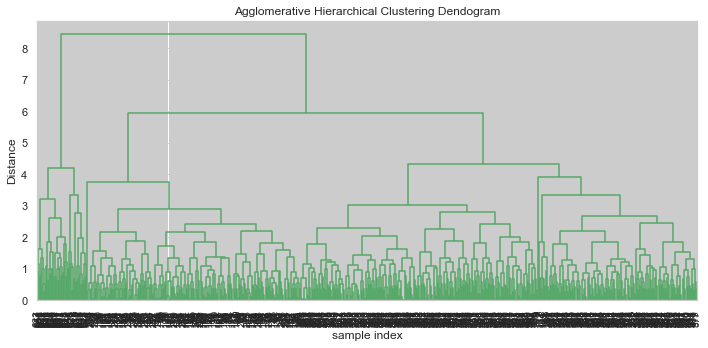

In [75]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=90,  leaf_font_size=10. )
plt.tight_layout()

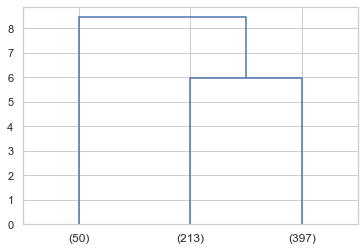

In [76]:
# Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

In [77]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(credit_card_scaled_hier, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(credit_card_scaled_hier))

c

0.7415156284827493

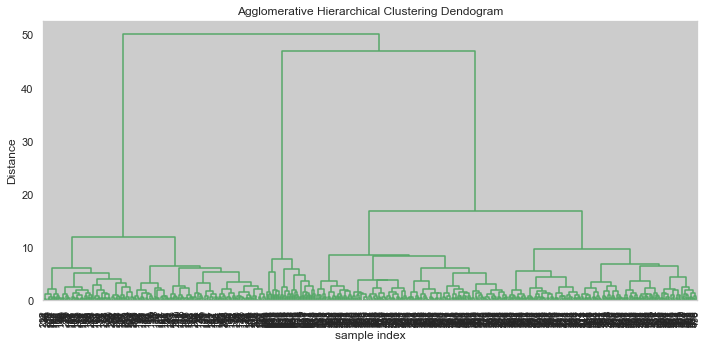

In [78]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=600,  leaf_font_size=10. )
plt.tight_layout()

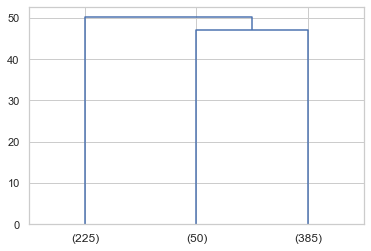

In [79]:
# Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

In [80]:
# The best results are with linkage method as 'average' with a score of 0.8977

#### Let's analyze the groups for their characteristics

In [81]:
credit_card_df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,1,87073,100000,2,1,1,0,0
1,2,38414,50000,3,0,10,9,1
2,3,17341,50000,7,1,3,4,0
3,4,40496,30000,5,1,1,4,0
4,5,47437,100000,6,0,12,3,2


C:\Users\Aagarwal2\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Aagarwal2\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Aagarwal2\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


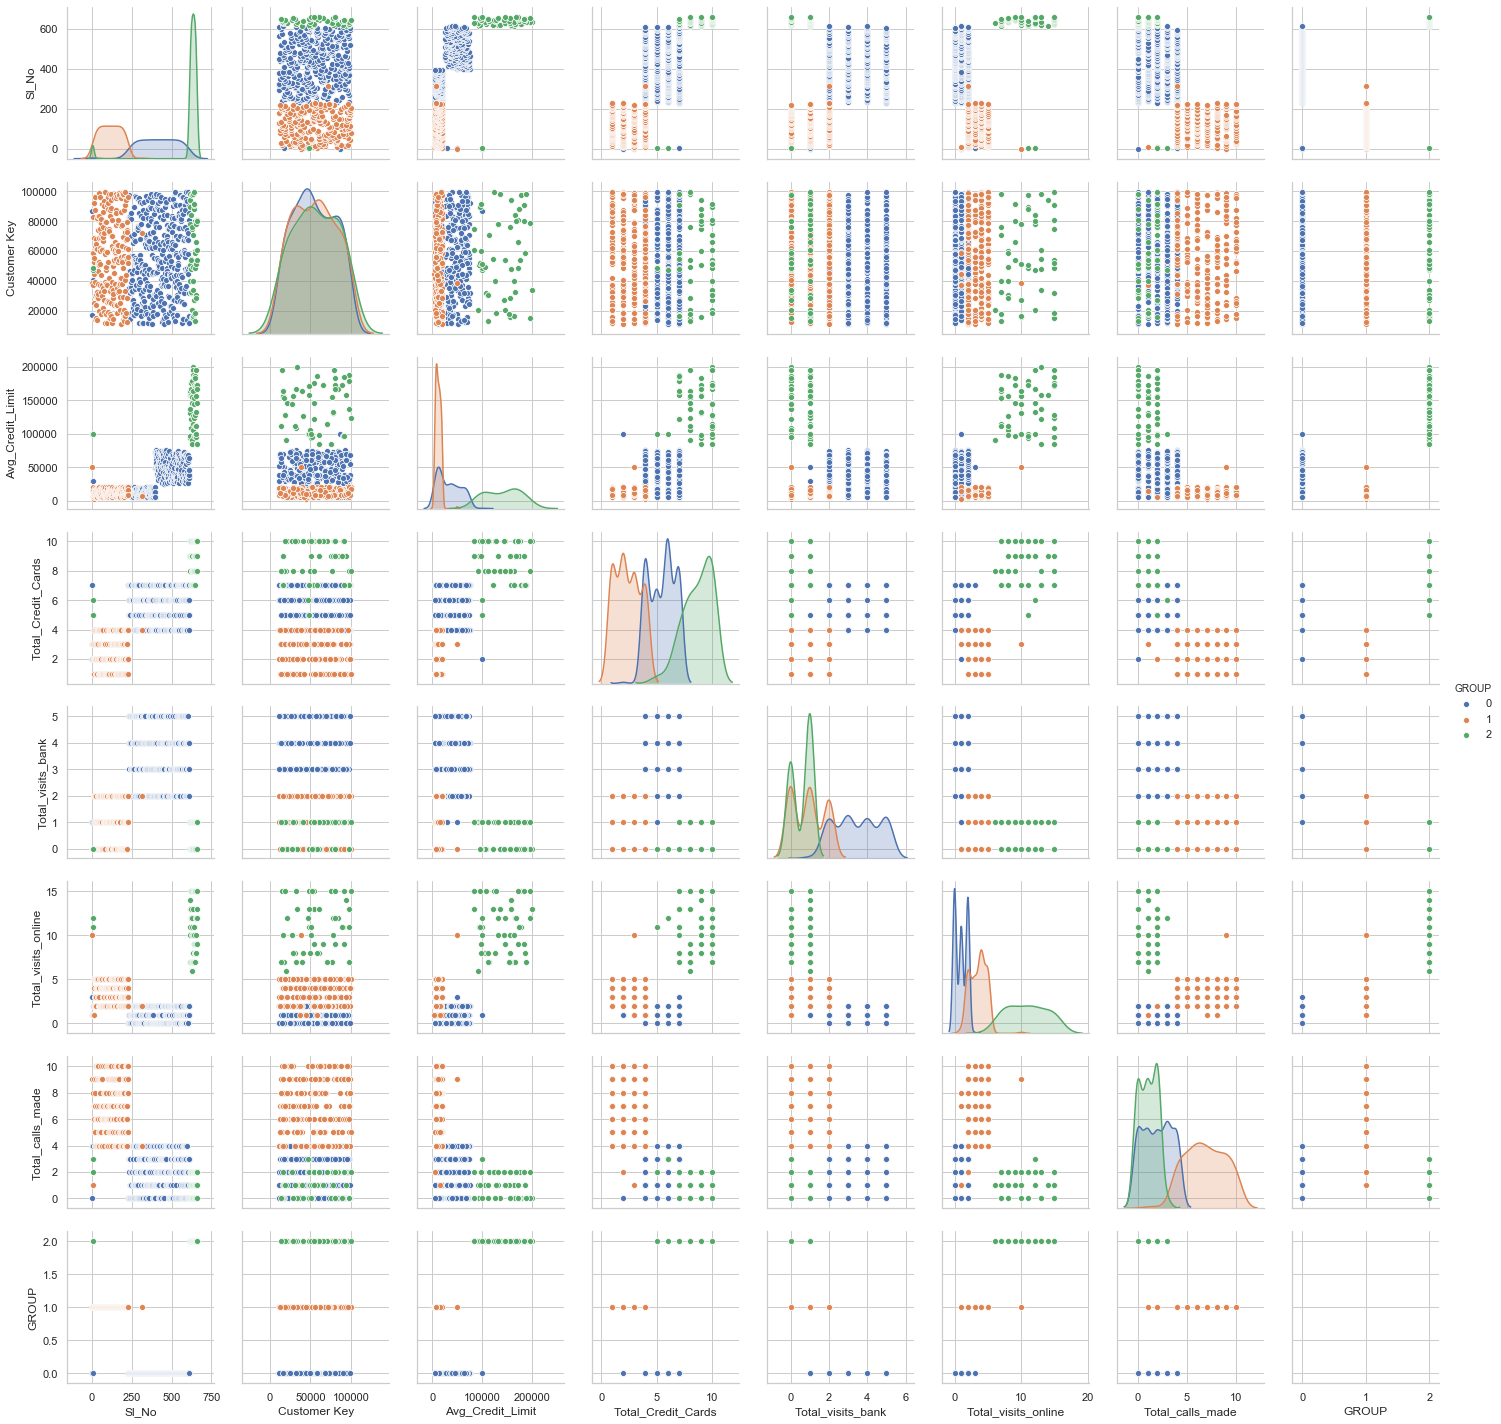

In [82]:
sns.pairplot(credit_card_df, hue='GROUP', size=2.5);

#### Let's explore Group 0.

In [83]:
credit_card_df_Group0 = credit_card_df.query('GROUP == "0"')

In [84]:
credit_card_df_Group0.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sl_No,386.0,417.528497,116.525101,1.0,323.25,419.5,515.75,612.0
Customer Key,386.0,54881.329016,25310.250292,11265.0,34540.50,52731.0,76840.75,99473.0
Avg_Credit_Limit,386.0,33782.383420,22169.460696,5000.0,13000.00,31000.0,52000.00,100000.0
Total_Credit_Cards,386.0,5.515544,1.140069,2.0,4.00,6.0,6.00,7.0
Total_visits_bank,386.0,3.489637,1.135563,1.0,3.00,3.0,5.00,5.0
Total_visits_online,386.0,0.981865,0.857167,0.0,0.00,1.0,2.00,3.0
Total_calls_made,386.0,2.000000,1.430648,0.0,1.00,2.0,3.00,4.0
GROUP,386.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0


In [85]:
credit_card_df_Group0['Total_Credit_Cards'].value_counts()

6    116
4    102
7     94
5     73
2      1
Name: Total_Credit_Cards, dtype: int64

In [86]:
# Most customers in this group have 1 to 4 cards with a median of 2 cards

In [87]:
credit_card_df_Group0['Total_visits_bank'].value_counts()

3    100
5     98
2     93
4     92
1      3
Name: Total_visits_bank, dtype: int64

In [88]:
# Nearly 1/3 of the customers do not visit the bank. Others make 1 to 2 visits

In [89]:
credit_card_df_Group0['Total_visits_online'].value_counts()

0    144
2    135
1    106
3      1
Name: Total_visits_online, dtype: int64

In [90]:
# Most customers have 2 to 5 visits online with a median of 4 visits

In [91]:
credit_card_df_Group0['Total_calls_made'].value_counts()

3    82
0    81
4    77
1    74
2    72
Name: Total_calls_made, dtype: int64

In [92]:
# Most customers have 4 to 10 calls to the call center.

In [93]:
# They form about 34% of the customer base.
# The first cluster is a group of customers with:
# Average credit card limit within $3K to $50K with a median limit of $12K
# These customers carry 1 to 4 cards with a median of 2 cards
# They usually have none to a maximum of 2 visits to the Bank. Low visits
# They visit online between 1 to 10 times with a median of 4 visits
# They make at least one and up to 10 calls to the call center with a median of 7 calls. 
# They make the higher volume for the call center

In [94]:
# Group 0 forms the low net worth individuals with low credit card 
# limit, one or few credit cards, few visits to the bank, mostly online 
# transactions and multiple calls to the call center. 

#### Let's explore Group 1.

In [95]:
credit_card_df_Group1 = credit_card_df.query('GROUP == "1"')

In [96]:
credit_card_df_Group1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sl_No,224.0,117.857143,65.744492,2.0,61.75,117.5,173.25,314.0
Customer Key,224.0,55239.830357,25993.893000,11412.0,33284.50,55235.5,76333.25,99596.0
Avg_Credit_Limit,224.0,12174.107143,5249.048524,3000.0,8000.00,12000.0,16000.00,50000.0
Total_Credit_Cards,224.0,2.410714,1.100783,1.0,1.00,2.0,3.00,4.0
Total_visits_bank,224.0,0.933036,0.803567,0.0,0.00,1.0,2.00,2.0
Total_visits_online,224.0,3.553571,1.218978,1.0,2.00,4.0,4.00,10.0
Total_calls_made,224.0,6.870536,1.990161,1.0,5.00,7.0,9.00,10.0
GROUP,224.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0


In [97]:
# They form about 58% of the customer base.
# The second cluster is a group of customers with:
# Average credit card limit within $5K to $100K with a median limit of $31K
# These customers carry 2 to 7 cards with a median of 6 cards
# They usually have 1 to a maximum of 5 visits to the Bank with 3 median visits
# They visit online between 0 to 3 times with a median of 1 visit
# They make at least one and up to 4 calls to the call center with a median of 2 calls. 


In [98]:
credit_card_df_Group1['Total_Credit_Cards'].value_counts()

2    63
1    59
3    53
4    49
Name: Total_Credit_Cards, dtype: int64

In [99]:
# Most customers in this group have more than 4 credit cards with a median of 6 cards

In [100]:
credit_card_df_Group1['Total_visits_bank'].value_counts()

0    80
1    79
2    65
Name: Total_visits_bank, dtype: int64

In [101]:
# Most customers have visited the bank more than 2 or more times. 

In [102]:
credit_card_df_Group1['Total_visits_online'].value_counts()

4     69
5     54
2     54
3     43
1      3
10     1
Name: Total_visits_online, dtype: int64

In [103]:
# Nearly 1/3 of the customers do not go online. The other 2/3 make 1 to 2 visits.

In [104]:
credit_card_df_Group1['Total_calls_made'].value_counts()

6     39
7     35
9     32
4     31
8     30
5     29
10    26
2      1
1      1
Name: Total_calls_made, dtype: int64

In [105]:
# Most customers have 1 to 4 calls made to the call center with a median of 2 calls

In [106]:
# Group 1 forms the medium net worth individuals with multiple credit cards 
# higher visits to the bank, low online presence and higher calls to the call center.

#### Let's explore Group 2.

In [107]:
credit_card_df_Group2 = credit_card_df.query('GROUP == "2"')

In [108]:
credit_card_df_Group2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sl_No,50.0,611.28,125.557701,5.0,623.25,635.5,647.75,660.0
Customer Key,50.0,56708.76,26862.130097,13315.0,32897.25,53875.0,79713.75,99843.0
Avg_Credit_Limit,50.0,141040.00,34457.877272,84000.0,108750.00,145500.0,170000.00,200000.0
Total_Credit_Cards,50.0,8.74,1.274715,5.0,8.00,9.0,10.00,10.0
Total_visits_bank,50.0,0.60,0.494872,0.0,0.00,1.0,1.00,1.0
Total_visits_online,50.0,10.90,2.880264,6.0,8.00,11.0,13.00,15.0
Total_calls_made,50.0,1.08,0.876915,0.0,0.00,1.0,2.00,3.0
GROUP,50.0,2.00,0.000000,2.0,2.00,2.0,2.00,2.0


In [109]:
# They form about 7.5% of the customer base.
# The second cluster is a group of customers with:
# Average credit card limit within $84K to $200K with a median limit of $145K
# These customers carry 5 to 10 cards with a median of 9 cards
# They usually have 0 to a maximum of 1 visit to the Bank
# They visit online between 6 to 15 times with a median of 11 visits
# They make at least two and up to 2 calls to the call center with a median of 2 calls. 


In [110]:
credit_card_df_Group2['Total_Credit_Cards'].value_counts()

10    19
9     11
8     11
7      7
6      1
5      1
Name: Total_Credit_Cards, dtype: int64

In [111]:
# Most customers in this cluster have 7 to 10 cards.

In [112]:
credit_card_df_Group2['Total_visits_bank'].value_counts()

1    30
0    20
Name: Total_visits_bank, dtype: int64

In [113]:
# Customers in this segment either do not visit the bank or have at most 1 visit

In [114]:
credit_card_df_Group2['Total_visits_online'].value_counts()

15    10
7      7
12     6
8      6
13     5
11     5
10     5
9      4
14     1
6      1
Name: Total_visits_online, dtype: int64

In [115]:
# In this segment, the customers are mostly online. 

In [116]:
credit_card_df_Group2['Total_calls_made'].value_counts()

2    18
0    16
1    15
3     1
Name: Total_calls_made, dtype: int64

In [117]:
# The customers in this segment are also low on call center calls. 
# Usually 1 or 2 calls to the call center are made

In [118]:
# Group 2 forms the high net worth individuals with high credit card 
# limit, multiple credit cards, no visits to the bank, mostly online 
# transactions and a one or two calls to the call center. 

#### Recommendations to the Marketing and Delivery Teams


In [119]:
# Group 0:
# Increase the number of cards carried by each customer within the cluster
# Provide online tools to reduce visits to the bank
# Run a survey with this group on call center services to improve services.
# Deflect this group towards online services and reduce call center calls.

# Group 1:
# Increase the number of cards carried by each customer within the cluster
# Provide online tools to reduce calls to the call center and bank visits

# Group 2:
# Increase the number of cards carried by each customer within the cluster
# Provide value added services to these customers
# Provide personalized services through the call center
# Enhance online experience with personalized offers.
